## Video Summarization Strategies

In [1]:
filename = '../data/external/SYRIA_VIDEOS/_07dbU4XqcY.mp4'

In [2]:
import skvideo.io
import skvideo.measure
import numpy as np

In [4]:
from __future__ import print_function
import os

import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector

STATS_FILE_PATH = 'testvideo.stats.csv'



# Create a video_manager point to video file testvideo.mp4. Note that multiple
# videos can be appended by simply specifying more file paths in the list
# passed to the VideoManager constructor. Note that appending multiple videos
# requires that they all have the same frame size, and optionally, framerate.
video_manager = VideoManager([filename])
stats_manager = StatsManager()
scene_manager = SceneManager(stats_manager)
# Add ContentDetector algorithm (constructor takes detector options like threshold).
scene_manager.add_detector(ContentDetector())
base_timecode = video_manager.get_base_timecode()

try:


    start_time = base_timecode + 20     # 00:00:00.667
    end_time = base_timecode + 20.0     # 00:00:20.000
    # Set video_manager duration to read frames from 00:00:00 to 00:00:20.
    video_manager.set_duration(start_time=start_time, end_time=end_time)

    # Set downscale factor to improve processing speed (no args means default).
    video_manager.set_downscale_factor()

    # Start video_manager.
    video_manager.start()

    # Perform scene detection on video_manager.
    scene_manager.detect_scenes(frame_source=video_manager)

    # Obtain list of detected scenes.
    scene_list = scene_manager.get_scene_list(base_timecode)
    # Like FrameTimecodes, each scene in the scene_list can be sorted if the
    # list of scenes becomes unsorted.

    print('List of scenes obtained:')
    for i, scene in enumerate(scene_list):
        print('    Scene %2d: Start %s / Frame %d, End %s / Frame %d' % (
            i+1,
            scene[0].get_timecode(), scene[0].get_frames(),
            scene[1].get_timecode(), scene[1].get_frames(),))

    
    
finally:
    video_manager.release()

100%|██████████| 478/478 [00:01<00:00, 400.31frames/s]

List of scenes obtained:
    Scene  1: Start 00:00:00.804 / Frame 20, End 00:00:06.191 / Frame 154
    Scene  2: Start 00:00:06.191 / Frame 154, End 00:00:12.221 / Frame 304
    Scene  3: Start 00:00:12.221 / Frame 304, End 00:00:18.573 / Frame 462
    Scene  4: Start 00:00:18.573 / Frame 462, End 00:00:19.216 / Frame 478


In [5]:
scene_list

[(FrameTimecode(frame=20, fps=24.875039),
  FrameTimecode(frame=154, fps=24.875039)),
 (FrameTimecode(frame=154, fps=24.875039),
  FrameTimecode(frame=304, fps=24.875039)),
 (FrameTimecode(frame=304, fps=24.875039),
  FrameTimecode(frame=462, fps=24.875039)),
 (FrameTimecode(frame=462, fps=24.875039),
  FrameTimecode(frame=478, fps=24.875039))]

In [ ]:
# using the "edge" algorithm
scene_edge_idx = skvideo.measure.scenedet(videodata, method='edges')
scene_edge = np.zeros((num_frames,))
scene_edge[scene_edge_idx] = 1

In [16]:
a = scene_list[0][0]

In [17]:
a

FrameTimecode(frame=20, fps=24.875039)

In [15]:
a.frame_num

20

In [28]:
video_manager.get_num_videos()

0

In [23]:
video_manager.start()a

VideoDecodingInProgress: 

In [27]:
video_manager.grab(20)

TypeError: grab() takes 1 positional argument but 2 were given

In [26]:
video_manager.read()

TypeError: read() takes 1 positional argument but 2 were given

In [30]:
video_manager.release()

In [32]:
from moviepy.editor import VideoFileClip

In [60]:
clip = VideoFileClip(filename)

In [37]:
import matplotlib.pyplot as plt

In [40]:
from PIL import Image

In [41]:
sample_image = Image.fromarray(clip.get_frame(20))

In [47]:
a = sample_image.resize((120,120))

In [50]:
np.array(a).shape

(120, 120, 3)

In [52]:
scene_list[0][0].frame_num

20

In [54]:
frame_list = [x[0].frame_num for x in scene_list]

In [55]:
frame_list

[20, 154, 304, 462]

In [67]:
len(list(clip.iter_frames()))

/home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file ../data/external/SYRIA_VIDEOS/_07dbU4XqcY.mp4, 2764800 bytes wanted but 0 bytes read,at frame 3201/3202, at time 128.04/128.06 sec. Using the last valid frame instead.
  UserWarning)


3202

In [72]:
clip.get_frame()

TypeError: 'VideoFileClip' object does not support indexing

In [77]:
frames = [Image.fromarray(f).resize((120,120)) for i,f in enumerate(clip.iter_frames()) if i in frame_list]

/home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file ../data/external/SYRIA_VIDEOS/_07dbU4XqcY.mp4, 2764800 bytes wanted but 0 bytes read,at frame 3201/3202, at time 128.04/128.06 sec. Using the last valid frame instead.
  UserWarning)


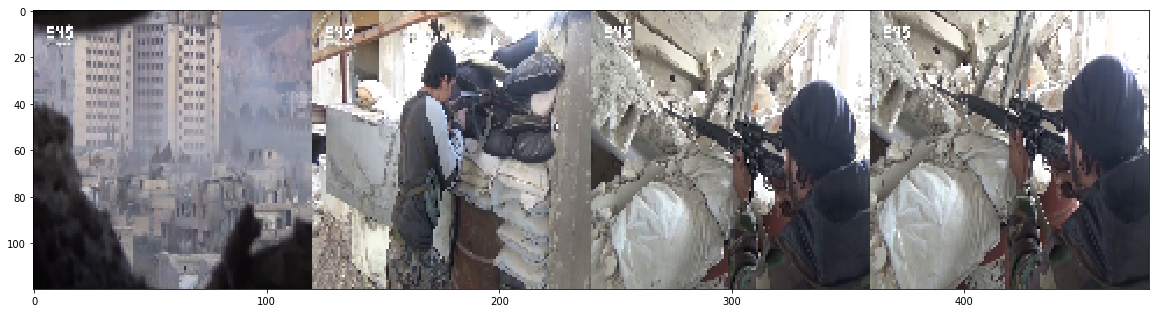

In [78]:
plt.figure(figsize=(20,20))
plt.imshow(np.hstack(frames))

In [57]:
file_summary = [Image.fromarray(clip.get_frame(x)) for x in frame_list]

/home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file ../data/external/SYRIA_VIDEOS/_07dbU4XqcY.mp4, 2764800 bytes wanted but 0 bytes read,at frame 3851/3202, at time 154.04/128.06 sec. Using the last valid frame instead.
  UserWarning)


OSError: MoviePy error: failed to read the first frame of video file ../data/external/SYRIA_VIDEOS/_07dbU4XqcY.mp4. That might mean that the file is corrupted. That may also mean that you are using a deprecated version of FFMPEG. On Ubuntu/Debian for instance the version in the repos is deprecated. Please update to a recent version from the website.

In [58]:
%debug

> /home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py(139)read_frame()
    137                                "for instance the version in the repos is deprecated. "
    138                                "Please update to a recent version from the website.")%(
--> 139                                 self.filename))
    140 
    141             result = self.lastread



ipdb>  up


> /home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py(183)get_frame()
    181             else:
    182                 self.skip_frames(pos-self.pos-1)
--> 183             result = self.read_frame()
    184             self.pos = pos
    185             return result



ipdb>  up


> /home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/video/io/VideoFileClip.py(113)<lambda>()
    111         else:
    112 
--> 113             self.make_frame = lambda t: self.reader.get_frame(t)
    114 
    115         # Make a reader for the audio, if any.



ipdb>  up


> /home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/Clip.py(94)get_frame()
     92                 return frame
     93         else:
---> 94             return self.make_frame(t)
     95 
     96     def fl(self, fun, apply_to=None, keep_duration=True):



ipdb>  up


> /home/felipe/anaconda3/lib/python3.6/site-packages/moviepy/decorators.py(89)wrapper()
     87         new_kw = {k: fun(v) if k in varnames else v
     88                  for (k,v) in kw.items()}
---> 89         return f(*new_a, **new_kw)
     90     return decorator.decorator(wrapper)
     91 



ipdb>  up


> <decorator-gen-134>(2)get_frame()



ipdb>  up


> <ipython-input-57-1bf031df3ae5>(1)<listcomp>()
----> 1 file_summary = [Image.fromarray(clip.get_frame(x)) for x in frame_list]



ipdb>  x


154


ipdb>  exit()


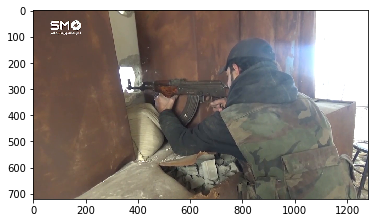

In [38]:
plt.imshow(clip.get_frame(20))